In [1]:
from dolfin import *
import numpy as np

In [22]:
c=5

nx = ny = 20
mesh = RectangleMesh(Point(-1, -1), Point(1, 1), nx, ny)
V = FunctionSpace(mesh, 'P', 1)

In [23]:
# Define boundary condition
def boundary(x, on_boundary):
    return on_boundary

In [24]:
T = 0.2            # final time
num_steps = 200     # number of time steps
dt = T / num_steps # time step size

print(dt)

0.001


In [25]:
# Define initial value
u_0 = Expression('exp(-a*pow(x[0], 2) - a*pow(x[1], 2))',
                 degree=2, a=5)
u_n = interpolate(u_0, V)

u0 = interpolate(u_0, V)
u1 = interpolate(u_0, V)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)

Calling FFC just-in-time (JIT) compiler, this may take some time.


/usr/local/lib/python3.6/dist-packages/dolfin/common/plotting.py:152: UserWarning: The following kwargs were not used by contour: 'interactive'
  return ax.tricontourf(mesh2triang(mesh), C, levels, **kwargs)


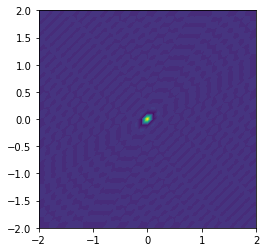

In [26]:
# Variational problem at each time

a = u*v*dx + dt*dt*c*c*inner(grad(u), grad(v))*dx
L = 2*u1*v*dx-u0*v*dx

bc = DirichletBC(V, Constant(0), boundary)

A, b = assemble_system(a, L, bc)

# Create VTK file for saving solution
vtkfile = File("wave.pvd")

u=Function(V)
t = 0

for step in range(num_steps):
    t += dt
    
    delta.apply(b)
    
    solve(A, u.vector(), b)
    u0.assign(u1)
    u1.assign(u)
    
    vtkfile << (u1, t)
    
plot(u1, interactive=False)